<a href="https://colab.research.google.com/github/Steven-Macas/PIA/blob/Python/tonisoriano_scrapy_faces_collage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creación del proyecto

In [ ]:
# instalación de Scrapy
!pip install Scrapy

In [ ]:
# creación del proyecto
!scrapy startproject project_faces scrapy

New Scrapy project 'project_faces', using template directory '/usr/local/lib/python3.8/dist-packages/scrapy/templates/project', created in:
    /content/scrapy

You can start your first spider with:
    cd scrapy
    scrapy genspider example example.com


In [ ]:
# creación del spider
!cd scrapy/project_faces && scrapy genspider FindFaces https://www.tinosoriano.com/

Created spider 'FindFaces' using template 'basic' in module:
  project_faces.spiders.FindFaces


## Edición de path/to/settings.py



*   USER_AGENT
*   ROBOTSTXT_OBEY
*   DEFAULT_REQUEST_HEADERS



In [ ]:
%%writefile scrapy/project_faces/settings.py

BOT_NAME = 'project_faces'

SPIDER_MODULES = ['project_faces.spiders']
NEWSPIDER_MODULE = 'project_faces.spiders'

USER_AGENT = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'

ROBOTSTXT_OBEY = False

DEFAULT_REQUEST_HEADERS = {
   'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
   'Accept-Language': 'es',
}

REQUEST_FINGERPRINTER_IMPLEMENTATION = '2.7'
TWISTED_REACTOR = 'twisted.internet.asyncioreactor.AsyncioSelectorReactor'

Overwriting scrapy/project_faces/settings.py


## Ejecución del spider

### No se debe ejecutar hasta que se haya implementado el spider.

In [ ]:
!cd scrapy/project_faces && scrapy crawl FindFaces

In [ ]:
!cd scrapy/project_faces && scrapy crawl FindFaces -o faces.json

In [ ]:
!cd scrapy/project_faces && scrapy crawl FindFaces

# Implementación del spider

## Versión inicial

In [ ]:
%%writefile scrapy/project_faces/spiders/FindFaces.py
import scrapy

class FindfacesSpider(scrapy.Spider):
    name = 'FindFaces'
    allowed_domains = ['www.tinosoriano.com/blog/']
    start_urls = ['https://www.tinosoriano.com/blog/']

    def parse(self, response):
        pass

## Versión modificada

In [ ]:
%%writefile scrapy/project_faces/spiders/FindFaces.py
import scrapy

class FindfacesSpider(scrapy.Spider):
    name = 'FindFaces'
    allowed_domains = ['www.tinosoriano.com']
    start_urls = ['https://www.tinosoriano.com/blog/']
    pages = 1

    def parse(self, response):
      posts = response.css('.entry > .entry-header')
      print('Pagina', self.pages)
      print('numero de entradas:', len(posts))
      for post in posts:
        href = post.css('.entry-title > a::attr(href)').get()
        print('href', href)
        yield scrapy.Request(href, callback = self.parse_post, meta={'href': href})
      next_page = response.css('.pagination-next')
      self.pages += 1
      if next_page and self.pages < 4:
        next_href = next_page.css('a::attr(href)').get()
        yield scrapy.Request(next_href)

    def parse_post(self, response):
      href = response.meta.get('href')
      print(href)
      elements = response.css('.wp-block-image')
      for element in elements:
        img = element.css('img::attr(src)').get()
        print(img)
        yield {
          'href': href,
          'img': img
        }

Overwriting scrapy/project_faces/spiders/FindFaces.py


## Procesando las caras de las imágenes

In [ ]:
from io import BytesIO
import cv2
from PIL import Image
import json
import numpy as np
import requests

In [ ]:
json_file = 'scrapy/project_faces/faces.json'
with open(json_file, 'r') as f:
  data = json.load(f)

images = []
for item in data:
  url = item['img']
  img = Image.open(BytesIO(requests.get(url).content))
  img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
  images.append(img)

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces_coords = []
face_count = 0
for img in images:
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(
        gray,
        scaleFactor = 1.2,
        minNeighbors = 8,
        minSize = (30, 30)
  )
  faces_coords.append(faces)
  print("Found {0} Faces!".format(len(faces)))
  face_count += len(faces)

Found 1 Faces!
Found 1 Faces!
Found 0 Faces!
Found 0 Faces!
Found 0 Faces!
Found 0 Faces!
Found 3 Faces!
Found 0 Faces!
Found 1 Faces!
Found 1 Faces!
Found 1 Faces!
Found 0 Faces!
Found 0 Faces!
Found 0 Faces!
Found 0 Faces!
Found 2 Faces!
Found 0 Faces!
Found 0 Faces!
Found 0 Faces!
Found 0 Faces!
Found 0 Faces!
Found 2 Faces!
Found 0 Faces!
Found 0 Faces!
Found 1 Faces!
Found 1 Faces!
Found 0 Faces!
Found 0 Faces!
Found 1 Faces!
Found 0 Faces!
Found 2 Faces!
Found 0 Faces!
Found 0 Faces!
Found 0 Faces!
Found 0 Faces!
Found 0 Faces!
Found 0 Faces!
Found 1 Faces!
Found 1 Faces!
Found 0 Faces!
Found 0 Faces!
Found 2 Faces!
Found 1 Faces!
Found 0 Faces!
Found 1 Faces!
Found 0 Faces!
Found 0 Faces!
Found 0 Faces!
Found 1 Faces!
Found 0 Faces!
Found 0 Faces!
Found 0 Faces!
Found 0 Faces!
Found 4 Faces!
Found 0 Faces!
Found 0 Faces!
Found 0 Faces!
Found 1 Faces!
Found 2 Faces!
Found 0 Faces!
Found 0 Faces!
Found 0 Faces!
Found 1 Faces!
Found 1 Faces!
Found 2 Faces!
Found 3 Faces!
Found 1 Fa

In [ ]:
#El total de imágenes que hemos obtenido de la página haciendo scrapy
len(images)

192

In [ ]:
#El total de imagenes con caras encontradas
face_count

117

In [ ]:
#El total de caras encontradas en cada imagen
len(faces_coords)

192

In [ ]:
#Recorremos el array faces_coords para obtener las coordenadas de las caras y recortamos la imagen.
faces_array = []

for a in range(len(images)):
  if len(faces_coords[a])<1:
    continue
  else:
    if len(faces_coords[a])==1:
      continue
    else:
      for n in faces_coords[a]:
        array = np.asarray(images[a])
        x = n[1]
        y = n[0]
        h = y + n[2]
        w = x + n[3]
        #Por último lo añadimos en un array con las imagenes ya recortadas
        faces_array.append(array[x:w,y:h])

In [ ]:
#Un problema es que los tamaños son desiguales, por eso aquí lo vamos ajustando todos al mismo tamaño. 100x100
tama_final = []
for p in faces_array:
  imagen = Image.fromarray(p)
  imagen = imagen.resize((100,100))
  array = np.asarray(imagen)
  tama_final.append(array)

In [231]:
#Ahora que ya están del mismo tamaño, podemos juntarlas
c = 0
for vertical in range(0,8):
  for horizontal in range(0,8):
      if horizontal==0:
        fila = tama_final[c]
        c+=1
      else:
        fila = np.hstack([fila,tama_final[c]])
        c+=1
  if vertical==0:
    matriz = fila
  else:
    matriz = np.vstack([matriz,fila])

In [232]:
#Convertimos el array con las coordenadas a Imagen
collage = Image.fromarray(matriz)

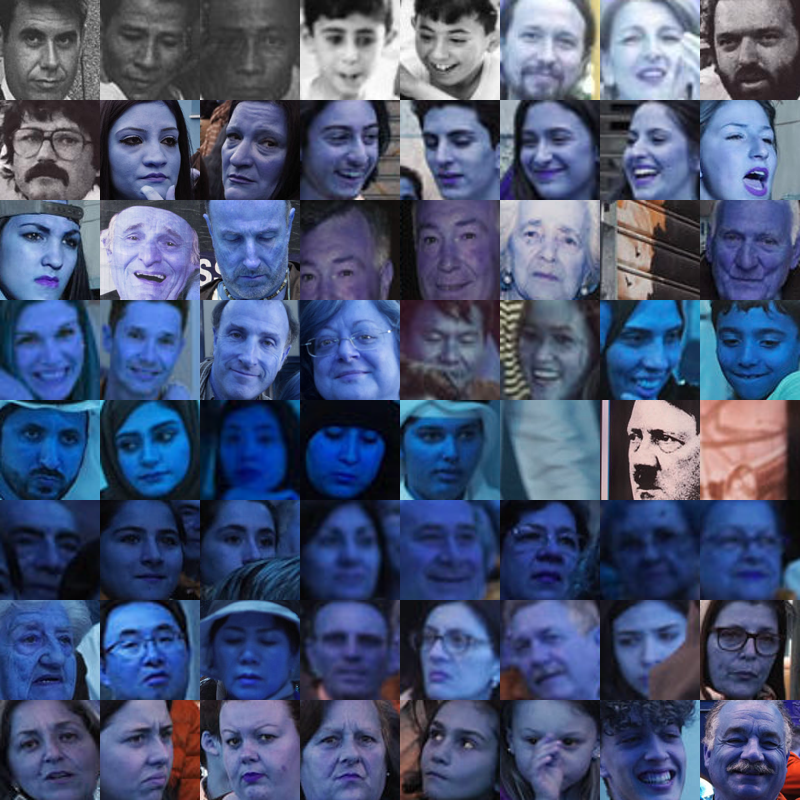

In [233]:
#Mostramos el collage con todas las caras
collage